In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [2]:
data = [
    [1,12],
    [2,14],
    [5,20],
    [13,36],
    [17,44],
    [19,48],
    [30,70],
    [37,84],
    [43,96],
    [50,110]
] # than what 23?

In [3]:
x = [x_row1[0] for x_row1 in data]    # 독립 변수 1
y_data = [y_row[1] for y_row in data]  # 실제 취득 성적

In [4]:
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

In [5]:
y = a * x + b
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))
learning_rate = 0.001
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    pre_v_a = 0
    step = 0
    while True:
        step += 1
        sess.run(gradient_decent)
        if step % 10000 == 0:  # 200번마다 결과 출력
            v_rmse = sess.run(rmse)
            v_a = sess.run(a)
            v_b = sess.run(b)
            # Epoch: 반복 횟수
            print("Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b = %.4f" % (
            step, v_rmse, v_a, v_b))
            if v_a == pre_v_a:
                break;
            pre_v_a = v_a

Epoch: 10000, RMSE = 39.1950, 기울기 a = 0.1249, y 절편 b = 74.4909
Epoch: 20000, RMSE = 35.5044, 기울기 a = 0.3014, y 절편 b = 68.4185
Epoch: 30000, RMSE = 31.8138, 기울기 a = 0.4780, y 절편 b = 62.3460
Epoch: 40000, RMSE = 28.1232, 기울기 a = 0.6546, y 절편 b = 56.2735
Epoch: 50000, RMSE = 24.4326, 기울기 a = 0.8311, y 절편 b = 50.2011
Epoch: 60000, RMSE = 20.7420, 기울기 a = 1.0077, y 절편 b = 44.1286
Epoch: 70000, RMSE = 17.0514, 기울기 a = 1.1843, y 절편 b = 38.0561
Epoch: 80000, RMSE = 13.3608, 기울기 a = 1.3608, y 절편 b = 31.9837
Epoch: 90000, RMSE = 9.6702, 기울기 a = 1.5374, y 절편 b = 25.9112
Epoch: 100000, RMSE = 5.9796, 기울기 a = 1.7139, y 절편 b = 19.8387
Epoch: 110000, RMSE = 2.2890, 기울기 a = 1.8905, y 절편 b = 13.7663
Epoch: 120000, RMSE = 0.3737, 기울기 a = 1.9862, y 절편 b = 10.0048
Epoch: 130000, RMSE = 0.3737, 기울기 a = 1.9863, y 절편 b = 9.9996
Epoch: 140000, RMSE = 0.3737, 기울기 a = 1.9863, y 절편 b = 9.9996
Epoch: 150000, RMSE = 0.3737, 기울기 a = 1.9863, y 절편 b = 9.9996
Epoch: 160000, RMSE = 0.3737, 기울기 a = 1.9863, y 절편 b = 9.99

In [10]:
print('산출 공식: y = %.1fx + %.d' % (v_a, v_b))  # y = 2.3x + 79

산출 공식: y = 1.9863x + 9


In [12]:
test_data=[i for i in range(1,101,10)]
test_data_result=[(i + 5) * 2 for i in test_data]
test_data_result_by_com=[]
for i in range(len(test_data)):
    y = v_a * test_data[i] + v_b
    test_data_result_by_com.append(y)
    print('입력 값: %d, 예상 답: %d, 실제 : %d' % (test_data[i], test_data_result_by_com[i], test_data_result[i]))

입력 값: 1, 예상 답: 11, 실제 : 12
입력 값: 11, 예상 답: 31, 실제 : 32
입력 값: 21, 예상 답: 51, 실제 : 52
입력 값: 31, 예상 답: 71, 실제 : 72
입력 값: 41, 예상 답: 91, 실제 : 92
입력 값: 51, 예상 답: 111, 실제 : 112
입력 값: 61, 예상 답: 131, 실제 : 132
입력 값: 71, 예상 답: 151, 실제 : 152
입력 값: 81, 예상 답: 170, 실제 : 172
입력 값: 91, 예상 답: 190, 실제 : 192


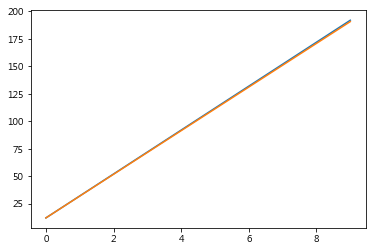

In [13]:
plt.plot(test_data_result)         # 실제값
plt.plot(test_data_result_by_com)  # 예측값 
plt.show()